# Семинар 11.03.2025 SVM

Сегодня не будем тонуть в математике или сложных задачках. Пробежимся немного по пакетной реализации **SVM** и подсоберём всё что уже знаем.

SVM - **support vector machines**.

**Суть метода**: найти такую гиперплоскость (прямую для 2D-пространства), до которой расстояние от ближайших точек будет максимально. (если нужно понять лучше перечитайте ещё раз). Нам нужно найти точки, которые ближе всего к "краю" кластера точек одного класса и провести разделяющую гиперплоскость так, чтобы в сумме расстояния от неё до этих точек было максимально. 

Но на самом деле мы можем **"ошибаться"**, т.е. некоторым точкам давать поблажку и даже, если они близки к будущей границе, то мы не будем их учитывать (насколько сильно можно ошибаться определяет гиперпараметр *c*) 

Поехали!


# Код по лекции

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.svm import SVC #! то что надо
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Играть с этим методом будем на стандартном датасете `Iris Dataset` (да, скучно, но поверьте - это лучший способ понять базовое поведение моделек, чтоб потом чисто SVM на AlphaFold2 запускать)

In [3]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [5]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Для простоты давайте оставим пока только два класса (setosa и versicolor)

In [7]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Как выглядят наши данные

In [8]:
#Нам немножко нужна функция. 
#Не прям нужна, на как гвоорится "Если кто-то написал функцию? значит это кому-то нужно"

def plot_2iris(iris= datasets.load_iris()):
    X = iris["data"][:, (2, 3)]  # petal length, petal width
    y = iris["target"]
    setosa_or_versicolor = (y == 0) | (y == 1)
    X = X[setosa_or_versicolor]
    y = y[setosa_or_versicolor]
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
    plt.ylabel("Petal width", fontsize=14)
    plt.xlabel("Petal length", fontsize=14)
    plt.axis([0, 5.5, 0, 2])

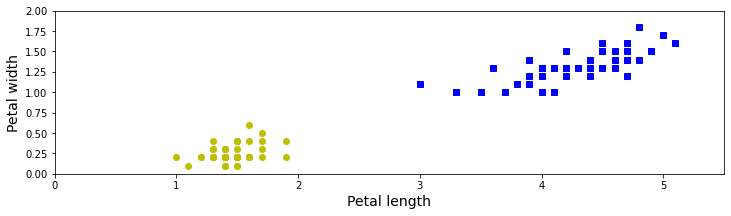

In [9]:
plt.figure(figsize=(12,3))
plot_2iris()
plt.show()

Классы находятся друг от друга достаточно далеко, но вопрос какую именно прямую выбрать.

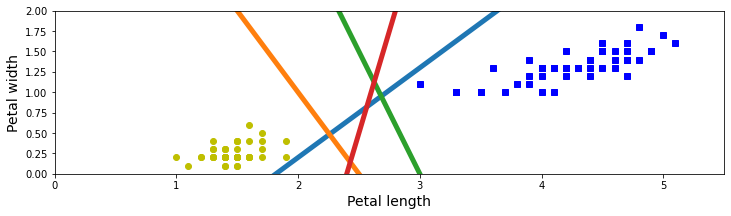

In [10]:
plt.figure(figsize=(12,3))
plot_2iris()
x0 = np.linspace(0, 5, 200)
for (b, k) in ((1.1, 2), (-2, -5), (-3, -9), (5, 12)):
    y0 = b * x0 - k
    plt.plot(x0, y0, linewidth=5)
plt.show()

Да, правильный ответ вы уже знаете

In [11]:
#Опять немного функций
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Уравнение границы раздела (aka decision boundary):
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

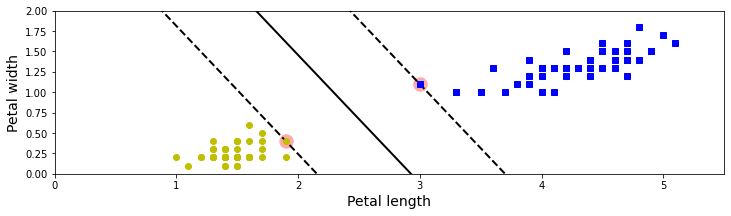

In [12]:
svm_clf = SVC(kernel="linear", C=np.inf)
svm_clf.fit(X, y)

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,3))
plot_svc_decision_boundary(svm_clf, 0, 5.5)

plot_2iris()
plt.show()

Глянем что вывел алгоритм

In [13]:
svm_clf.coef_[0]

array([1.29411744, 0.82352928])

In [14]:
svm_clf.intercept_[0]

-3.7882347112962464

Но этот классификатор слишком прямолинеен. Смотрим с выбросом:

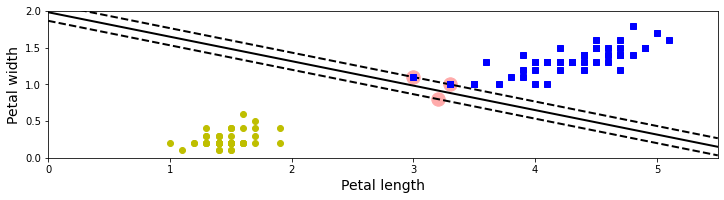

In [15]:
svm_clf = SVC(kernel="linear", C=np.inf)
X_out = np.concatenate([X, np.array([3.2, 0.8]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

svm_clf.fit(X_out, y_out)

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,2.7))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plot_2iris()
plt.axis([0, 5.5, 0, 2])
plt.show()

А так совсем сложно и базовый SVM не посчитает его

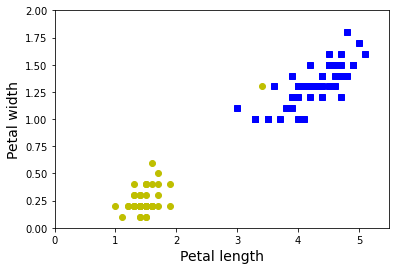

In [16]:
X_out = np.concatenate([X, np.array([3.4, 1.3]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Давайте позволим ошибаться нашему алгоритму:

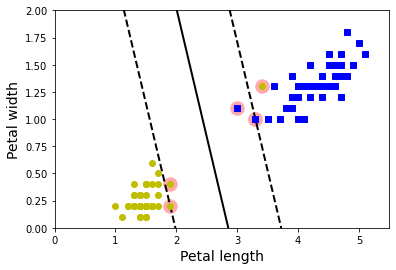

In [17]:
X_out = np.concatenate([X, np.array([3.4, 1.3]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_out, y_out)

plot_svc_decision_boundary(svm_clf, 0, 5.5)

plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

# Переход в пространство большей размерности

Давайте возьмём датасет посложнее `make_moons`

In [18]:
from sklearn.datasets import make_moons

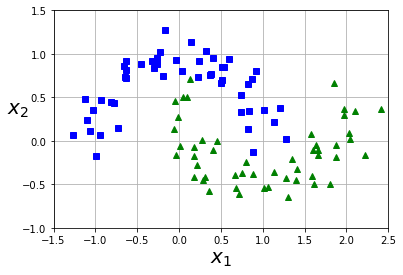

In [19]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

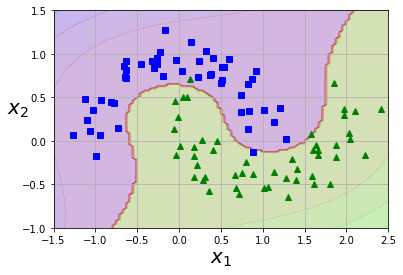

In [21]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

clf.fit(X, y)
plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show();

# Разные ядра *aka Kernel Trick*

In [22]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 500)
    x1s = np.linspace(axes[2], axes[3], 500)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

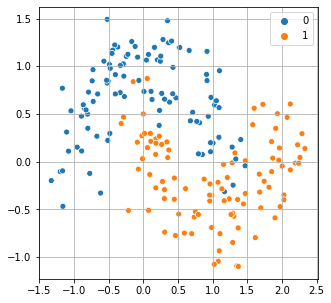

In [23]:
X, Y = datasets.make_moons(n_samples=200,
                           noise=0.25,
                           random_state=200)
plt.figure(figsize=(5,5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y)
plt.grid(True, which='both')
plt.show()

## Linear (база)

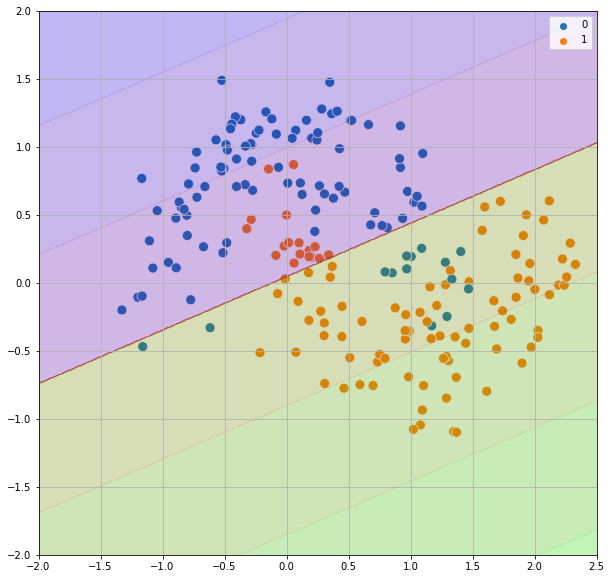

In [24]:
svm = SVC(kernel="linear", C=10)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

## Poly

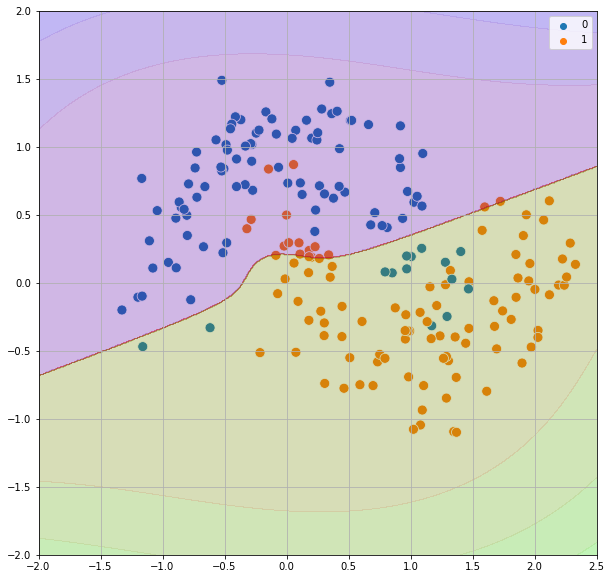

In [25]:
svm = SVC(kernel="poly", C=10)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

Поиграем со степенью полинома. За это отвечает параметр `degree`.

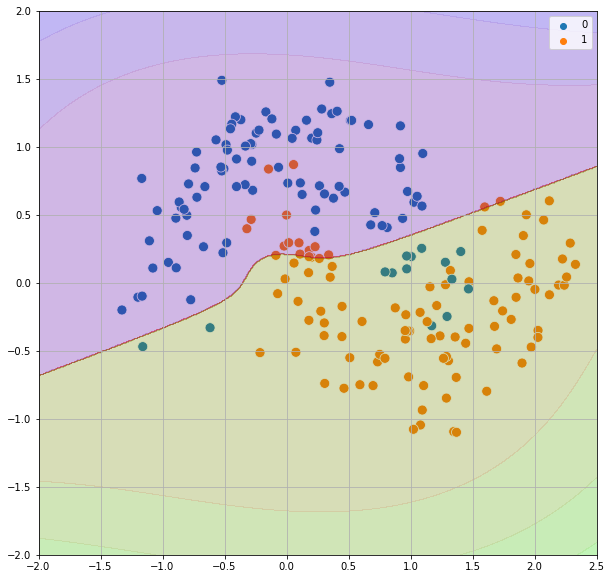

In [26]:
svm = SVC(kernel="poly", degree=3, C=10)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

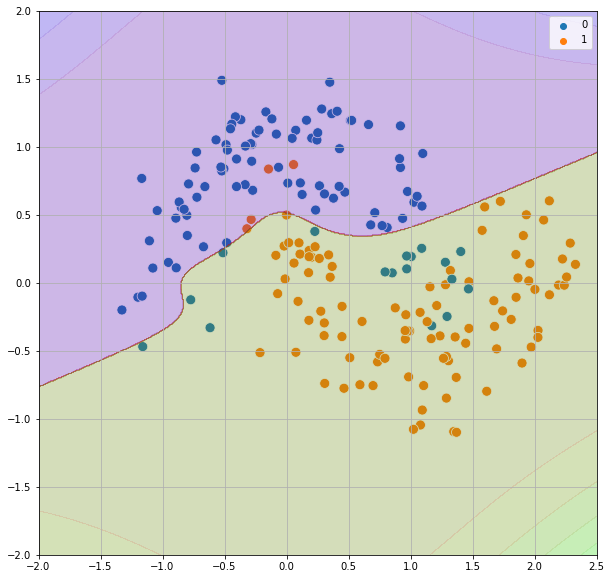

In [27]:
svm = SVC(kernel="poly", degree=5, C=10)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

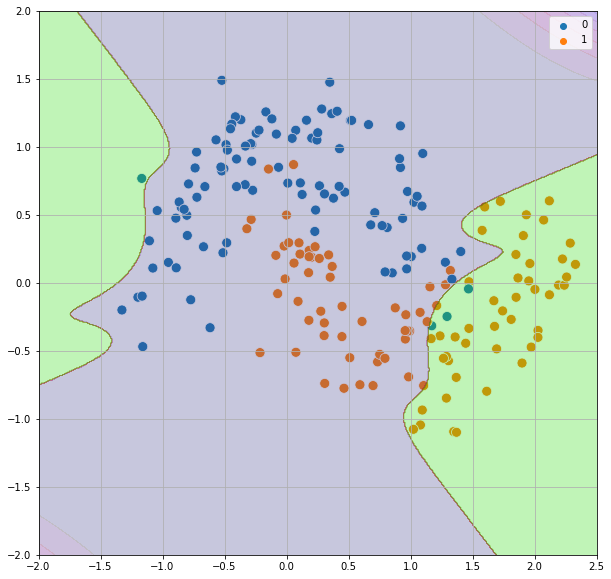

In [28]:
svm = SVC(kernel="poly", degree=10, C=10)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

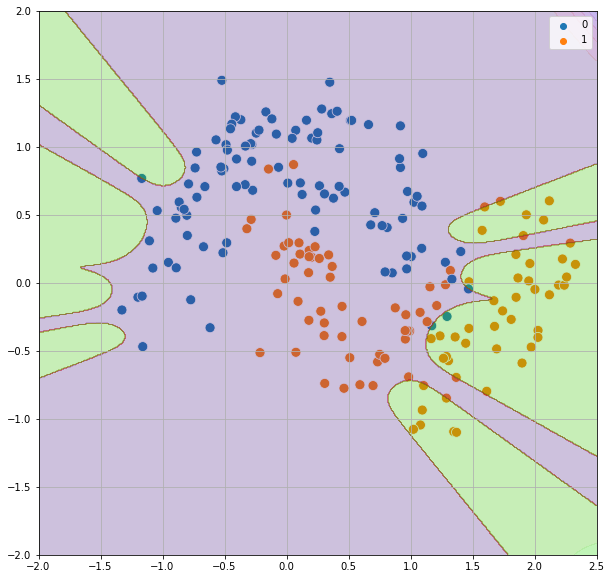

In [29]:
svm = SVC(kernel="poly", degree=20, C=10)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

## RBF

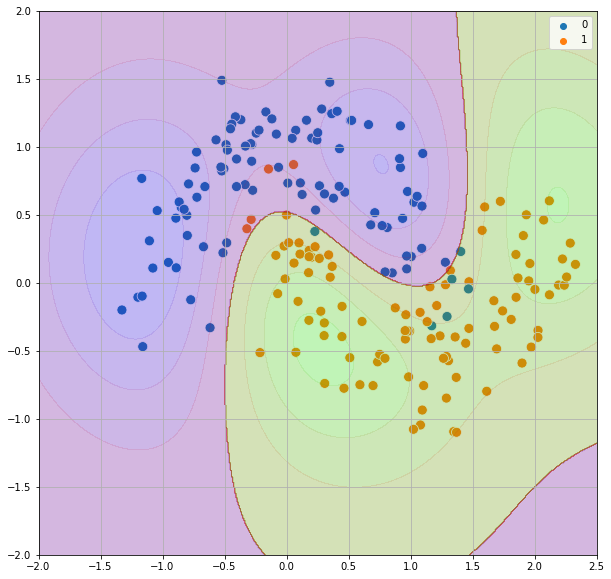

In [30]:
svm = SVC(kernel='rbf', C=10)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

# Машин-лёрнинг пайплайн

На лекции мы обсудили такой порядок работы с моделями машинного обучения. 

1. Выбор набора моделей для анализа
2. Оптимизация гиперпараметров
3. Разбивка на train/test/validate
4. K-Fold cross validation
5. Обучение моделей с гиперпараметрами и кросс-валидацией
6. Выбор лучшей модели
7. Оценка лучшей модели на валидации
8. Обучение финальной модели для дальнейшего практического использования

Давайте частично реализуем его для наших ирисов с испоьзованием такой штуки как `Pipeline` от `sklearn.pipeline`

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
# Данные
X, y = datasets.make_moons(n_samples=200,
                           noise=0.25,
                           random_state=200)

In [33]:
X

array([[ 6.08507452e-01, -2.82876152e-01],
       [ 1.74220662e+00, -2.05296252e-01],
       [ 2.07337434e+00,  4.63715909e-01],
       [ 2.75999805e-01, -2.07666949e-01],
       [ 1.00041614e-02,  7.35107741e-01],
       [-1.19881199e+00, -1.04449984e-01],
       [ 9.75500355e-01,  6.73682162e-01],
       [ 7.33947335e-01, -5.80326931e-01],
       [ 1.21090219e+00, -1.66131299e-01],
       [ 9.25105857e-02, -1.34983926e-01],
       [-1.16790597e+00,  7.69635002e-01],
       [ 5.61657263e-02,  8.71461597e-01],
       [ 9.57704773e-01, -4.12210802e-01],
       [ 1.59775871e+00,  5.59644970e-01],
       [-1.45481647e-01,  8.38597756e-01],
       [ 9.84198202e-01, -6.90818301e-01],
       [ 3.39334794e-01,  2.06790447e-01],
       [ 1.28055359e+00,  1.52645177e-01],
       [ 1.30558517e+00, -5.72035518e-01],
       [ 9.18250611e-01,  8.50053505e-01],
       [ 9.92893757e-01, -3.53285427e-01],
       [ 1.35942673e+00, -3.97193878e-01],
       [ 1.28871680e+00, -5.40384118e-01],
       [ 1.

In [34]:
y

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [35]:
# Делим датасет на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1804)

In [36]:
# Возьмём разные модели
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'SVM (linear)': SVC(kernel='linear'),
#     'SVM (poly, C=0)': SVC(kernel='poly', C=0),
    'SVM (poly, C=1)': SVC(kernel='poly', C=1),
    'SVM (poly, C=10)': SVC(kernel='poly', C=10),
    'SVM (rbf)': SVC(kernel='rbf')
}

In [37]:
# Кросс-валидация на 5 фолдах
results = {}
for name, model in models.items():
    print(f'~~~{name} training~~~')
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    results[name] = {
        'accuracy': scores.mean(),
        'std': scores.std()
    }
    print(f'{name} Finished')

~~~Logistic Regression training~~~
Logistic Regression Finished
~~~KNN training~~~
KNN Finished
~~~SVM (linear) training~~~
SVM (linear) Finished
~~~SVM (poly, C=1) training~~~
SVM (poly, C=1) Finished
~~~SVM (poly, C=10) training~~~
SVM (poly, C=10) Finished
~~~SVM (rbf) training~~~
SVM (rbf) Finished


In [38]:
# Метрики на кросс-валидации
for name, metrics in results.items():
    print(f"{name} - Accuracy: {metrics['accuracy']:.4f} ± {metrics['std']:.4f}")

Logistic Regression - Accuracy: 0.8562 ± 0.0755
KNN - Accuracy: 0.9187 ± 0.0424
SVM (linear) - Accuracy: 0.8562 ± 0.0673
SVM (poly, C=1) - Accuracy: 0.8688 ± 0.0234
SVM (poly, C=10) - Accuracy: 0.8875 ± 0.0250
SVM (rbf) - Accuracy: 0.9187 ± 0.0319


In [39]:
# Метрики на тесте (для блинчиков)

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

pd.DataFrame(results)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.850,0.818182,0.90,0.857143
1,KNN,0.950,0.950000,0.95,0.950000
2,SVM (linear),0.825,0.809524,0.85,0.829268
3,"SVM (poly, C=1)",0.850,0.791667,0.95,0.863636
4,"SVM (poly, C=10)",0.875,0.826087,0.95,0.883721
5,SVM (rbf),0.900,0.863636,0.95,0.904762


In [40]:
# Посмотрим на результаты предсказаний каждой модели, но сначала функция
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

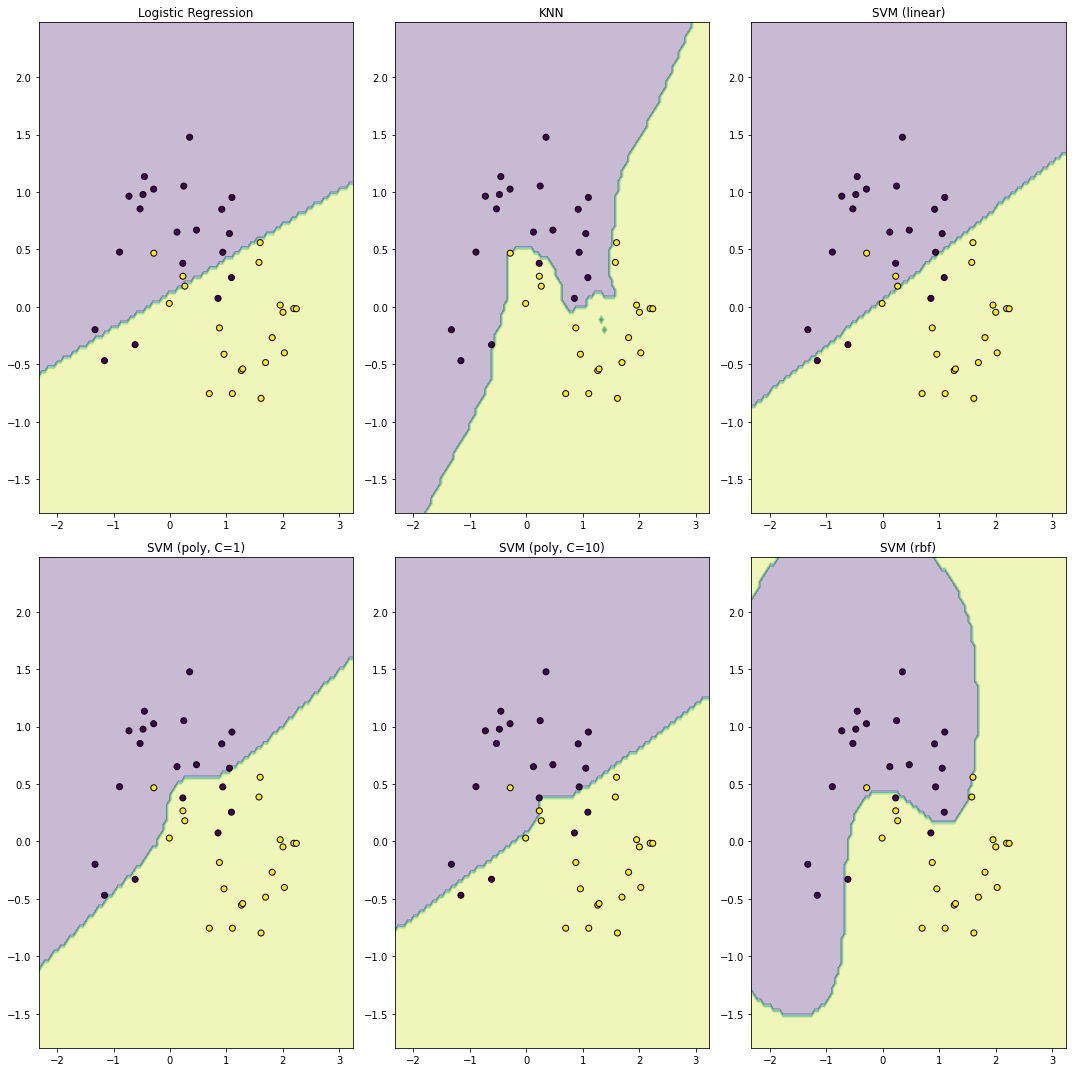

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
#     print(name)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
#     print('trained')
    
    ax = axes[i]
    plot_decision_boundary(pipeline, X_test, y_test, ax)
    
    ax.set_title(name)

plt.tight_layout()
plt.show()

# Дисбаланс классов

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

Using TensorFlow backend.


In [43]:
# Тут данные сами нагенерим, чтоб был дисбалансированных
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

In [44]:
# Поехали с модельками
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1103)

# Исходные данные
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification report before balancing:")
print(classification_report(y_test, y_pred))

# Downsampling
rus = RandomUnderSampler(random_state=2211)
X_downsampled, y_downsampled = rus.fit_resample(X_train, y_train)

model.fit(X_downsampled, y_downsampled)
y_pred_downsampled = model.predict(X_test)
print("Classification report after downsampling:")
print(classification_report(y_test, y_pred_downsampled))

# Upsampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_upsampled, y_upsampled = ros.fit_resample(X_train, y_train)

model.fit(X_upsampled, y_upsampled)
y_pred_upsampled = model.predict(X_test)
print("Classification report after upsampling:")
print(classification_report(y_test, y_pred_upsampled))

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

model.fit(X_smote, y_smote)
y_pred_smote = model.predict(X_test)
print("Classification report after SMOTE:")
print(classification_report(y_test, y_pred_smote))

Classification report before balancing:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       180
           1       0.95      0.90      0.92        20

    accuracy                           0.98       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.98      0.98      0.98       200

Classification report after downsampling:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       180
           1       0.66      0.95      0.78        20

    accuracy                           0.94       200
   macro avg       0.82      0.95      0.87       200
weighted avg       0.96      0.94      0.95       200

Classification report after upsampling:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       180
           1       0.86      0.95      0.90        20

    accuracy                           0.98       200
   mac

Пару слов про параметры SMOTE

* sampling_strategy: определяет соотношение числа примеров в меньшинственном классе после ресэмплинга к числу примеров в многочисленном классе. Значения могут быть различными: от доли (между 0 и 1) до 'auto', которое уравнивает количество примеров в классах.

* random_state: зерно для генератора случайных чисел.

* k_neighbors: количество ближайших соседей, используемых для создания синтетических примеров.

### Что-то ещё

**По SVM**

[Классный тутор по SVM](https://www.kaggle.com/code/prashant111/svm-classifier-tutorial)

[Получше понять kernel trick и разные кернелы](https://us06web.zoom.us/j/82854335770?pwd=aHaZwPasdAJFWOUaflMv4jDdRy6YAg.1)

[Заметка в LinkedIn'е про игрушечный пример с кернелом](https://www.linkedin.com/feed/update/urn:li:activity:7183847946038218753/?utm_source=share&utm_medium=member_android&rcm=ACoAAEimbLEBp81uTpacqSaRtj1JqNCBoxK0dpc)

[И ещё одна, но, возможно, менее наглядная](https://www.linkedin.com/pulse/magic-behind-support-vector-machines-unraveling-kernel-venugopal-adep-xqjnf?utm_source=share&utm_medium=member_android&utm_campaign=share_via)

**Геномка**

[gkmSVM для классификации последовательностей на основе k-mer](https://www.google.com/url?q=https%3A%2F%2Fwww.ncbi.nlm.nih.gov%2Fpmc%2Farticles%2FPMC4937197%2F)

[deltaSVM - аналогично предыдущему, но лучше]()


**Нереальное количество белков**

[Enzyme family classification by support vector machines](https://doi.org/10.1002/prot.20045)

[Predicting functional family of novel enzymes irrespective of sequence similarity: a statistical learning approach](https://doi.org/10.1093%2Fnar%2Fgkh984)

[Prediction of RNA-binding proteins from primary sequence by a support vector machine approach](https://doi.org/10.1261%2Frna.5890304)

[Protein function classification via support vector machine approach](https://doi.org/10.1016/S0025-5564(03)00096-8)

[SVM-Prot: web-based support vector machine software for functional classification of a protein from its primary sequence](https://doi.org/10.1093/nar/gkg600)

[Distinguishing enzyme structures from non-enzymes without alignments](https://doi.org/10.1016/S0022-2836(03)00628-4)

[Predicting Enzyme Class From Protein Structure Without Alignments](https://doi.org/10.1016/j.jmb.2004.10.024)

[Classifying G-protein coupled receptors with support vector machines](https://doi.org/10.1093/bioinformatics/18.1.147)

[Discrimination of outer membrane proteins using support vector machines](https://doi.org/10.1093/bioinformatics/bti697)

[Accurate discrimination of outer membrane proteins using secondary structure element alignment and support vector machine](https://doi.org/10.1142/s0219720014500036)

[Classification of nuclear receptors based on amino acid composition and dipeptide composition](https://doi.org/10.1074/jbc.m401932200)

[Protein structure prediction using support vector machine](https://airccse.org/journal/ijsc/papers/2112ijsc06.pdf)

[Если вы думали, что SVM на AlphaFold2 это шутка, то нет](https://doi.org/10.1038/s42003-022-03261-8)

**Другая биология/фарма/медицина**

[Drug design by machine learning: support vector machines for pharmaceutical data analysis](https://doi.org/10.1016/S0097-8485(01)00094-8)

[Development and validation of multiple machine learning algorithms for the classification of G-protein-coupled receptors using molecular evolution model-based feature extraction strategy - сравнение моделей](https://doi.org/10.1007/s00726-021-03080-x)

**SMOTE**

[раз](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification)

[два](https://habr.com/ru/companies/otus/articles/782668/)